# Housing Price Prediction and Analysis

In this project, I explored what can be learned from an extensive housing dataset embedded in a dense social context in Cook County, Illinois.

### Exploratory Data Analysis (EDA) and Feature Engineering
In the first part of the project, I conducted basic Exploratory Data Analysis (EDA) to understand the structure of the data. This involved:

**Data Visualization:** Creating various plots to visualize the distributions and relationships between different variables.
**Summary Statistics:** Calculating key statistics to get a sense of central tendencies and variability within the dataset.
Next, I focused on adding a few new features to the dataset while cleaning the data in the process. This step was crucial to ensure the dataset was in the best shape possible for modeling. The tasks included:

**Handling Missing Values:** Identifying and dealing with any missing data to prevent issues in the analysis.
**Feature Creation:** Developing new features based on the existing ones to capture more information and improve model performance.

### Linear Modeling and Error Analysis
In the second part of the project, I specified and fit a linear model for the purpose of prediction. This involved:

**Model Specification:** Defining the structure of the linear model and selecting the predictor variables.
**Model Fitting:** Using statistical techniques to estimate the model parameters.
Finally, I analyzed the error of the model and brainstormed ways to improve its performance. This included:

**Error Analysis:** Evaluating the model's predictions and understanding the sources of error.
**Model Improvement:** Considering additional features, transformations, or alternative models to enhance prediction accuracy.

In [1]:
import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

# Section 1: Housing Data Analysis in Cook County, Illinois

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## The Data

I worked with a dataset consisting of over 500,000 records from Cook County, Illinois, the county where Chicago is located. The dataset includes 61 features in total, with the 62nd feature being Sale Price, which I will predict using linear regression in the next part of this project. Detailed explanations of each variable can be found in the codebook.txt file, located in the data folder. Some columns have been filtered out to keep the focus on essential data cleaning and formatting tasks, ensuring the project remains manageable.

The data are divided into training and test sets, containing 204,792 and 68,264 observations, respectively. However, for this part of the project, I focused solely on the training set.

First, I extracted the data from the cook_county_data.zip file. The CSV files were compressed to save space, so I decompressed them to access the data.

In [2]:
with zipfile.ZipFile('data/cook_county_data.zip') as item:
    item.extractall()

Let's load the training data.

In [3]:
training_data = pd.read_csv("cook_county_train.csv", index_col='Unnamed: 0')

As a good sanity check, I verified that the data shape matches the description provided. This step ensures that the dataset has been loaded correctly and contains the expected number of rows and columns.

In [4]:
# 204,792 observations and 62 features in training data
assert training_data.shape == (204792, 62)
# Sale Price is provided in the training data
assert 'Sale Price' in training_data.columns.values

The next order of business was to get a feel for the variables in the data. A more detailed description of each variable is included in codebook.txt (in the same directory as this notebook). I took some time to familiarize myself with the codebook before moving forward.

To begin, I took a quick look at all the current columns in the training data to understand the variables better.

In [5]:
training_data.columns.values

array(['PIN', 'Property Class', 'Neighborhood Code', 'Land Square Feet',
       'Town Code', 'Apartments', 'Wall Material', 'Roof Material',
       'Basement', 'Basement Finish', 'Central Heating', 'Other Heating',
       'Central Air', 'Fireplaces', 'Attic Type', 'Attic Finish',
       'Design Plan', 'Cathedral Ceiling', 'Construction Quality',
       'Site Desirability', 'Garage 1 Size', 'Garage 1 Material',
       'Garage 1 Attachment', 'Garage 1 Area', 'Garage 2 Size',
       'Garage 2 Material', 'Garage 2 Attachment', 'Garage 2 Area',
       'Porch', 'Other Improvements', 'Building Square Feet',
       'Repair Condition', 'Multi Code', 'Number of Commercial Units',
       'Estimate (Land)', 'Estimate (Building)', 'Deed No.', 'Sale Price',
       'Longitude', 'Latitude', 'Census Tract',
       'Multi Property Indicator', 'Modeling Group', 'Age', 'Use',
       "O'Hare Noise", 'Floodplain', 'Road Proximity', 'Sale Year',
       'Sale Quarter', 'Sale Half-Year', 'Sale Quarter of Year'

In [6]:
training_data['Description'][0]

'This property, sold on 09/14/2015, is a one-story houeshold located at 2950 S LYMAN ST.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.'

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

## Part 1: Contextualizing the Data

Before diving into a full-scale analysis, I took some time to understand the background of the dataset. This step is crucial for setting the stage for the subsequent analysis.

The dataset provides information at the level of individual properties, with each row containing details about a single property sold in Cook County, Illinois. This granularity allows for a detailed examination of housing trends and factors influencing property sales in the region.

The data was probably collected by the Cook County government or an affiliated entity to oversee and manage the county's property market. This information might be utilized for research, such as studying the trends in property sales or understanding how different elements like location or property features influence sale values. Moreover, real estate experts, as well as prospective buyers or sellers, could benefit from this data to better understand the local market and make well-informed choices.

Something I practice commonly when I come accross datasets is crafting a few questions that this dataset could answer and how I would answer them. From the top of my head, I crafted these questions about housing in Cook County that can be answered with this dataset.

##### 1. How does the size of a property influence its selling price in Cook County?

To explore this, I'd produce a scatter plot comparing the "Sale Price" to both the "Land Square Feet" and "Building Square Feet" metrics. This visualization will help illustrate the correlation between the size of a property and its selling price. 

##### 2. How does the locality within Cook County impact the value of a property?

To answer this, I'd segment the data based on the "Neighborhood Code" and compute the average sale price for every locality. Subsequently, a bar chart displaying the average sale price for each neighborhood would be created to highlight the variance in property values across different areas.

##### 3. How does the annual income and occupation of property owners correlate with the sale prices of properties in Cook County?

To answer this I would visualize the results using scatter plots for a more intuitive understanding of the relationships. The scatter plot of "Sale Price" (from the existing data) versus "Annual Income" (from the additional information) would show if there's a clear trend of higher incomes buying more expensive properties.

*These questions provide a structured approach to exploring and contextualizing the dataset, focusing on property size, locality, and socio-economic factors that influence property prices in Cook County. By addressing these questions, I aim to gain a comprehensive understanding of the housing market in this region.*

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

## Part 2: Exploratory Data Analysis

This dataset was collected by the [Cook County Assessor's Office](https://datacatalog.cookcountyil.gov/Property-Taxation/Archive-Cook-County-Assessor-s-Residential-Sales-D/5pge-nu6u) to build a model for predicting the monetary value of a home. You can read more about data collection in the CCAO’s [Residential Data Integrity Preliminary Report](https://gitlab.com/ccao-data-science---modeling/ccao_sf_cama_dev/-/blob/master/documentation/Preliminary%20Report%20on%20Data%20Integrity%20June%207,%202019.pdf).

In the next section of this project, I will build a linear regression model to predict sales prices using the training data. However, it's important first to understand how the structure of the data informs such a model. In this section, I will create a series of exploratory visualizations and perform feature engineering in preparation for the prediction task.

Note that I will perform EDA on the **training data**.

#### Sale Price

I began by examining the distribution of the target variable `Sale Price`. I used the following helper method `plot_distribution` to visualize the distribution of the `Sale Price` using both a histogram and a box plot.

In [7]:
def plot_distribution(data, label):
    fig, axs = plt.subplots(nrows=2)

    sns.distplot(
        data[label], 
        ax=axs[0]
    )
    sns.boxplot(
        x=data[label],
        width=0.3, 
        ax=axs[1],
        showfliers=False,
    )

    # Align axes
    spacer = np.max(data[label]) * 0.05
    xmin = np.min(data[label]) - spacer
    xmax = np.max(data[label]) + spacer
    axs[0].set_xlim((xmin, xmax))
    axs[1].set_xlim((xmin, xmax))

    # Remove some axis text
    axs[0].xaxis.set_visible(False)
    axs[0].yaxis.set_visible(False)
    axs[1].yaxis.set_visible(False)

    # Put the two plots together
    plt.subplots_adjust(hspace=0)
    fig.suptitle("Distribution of " + label)

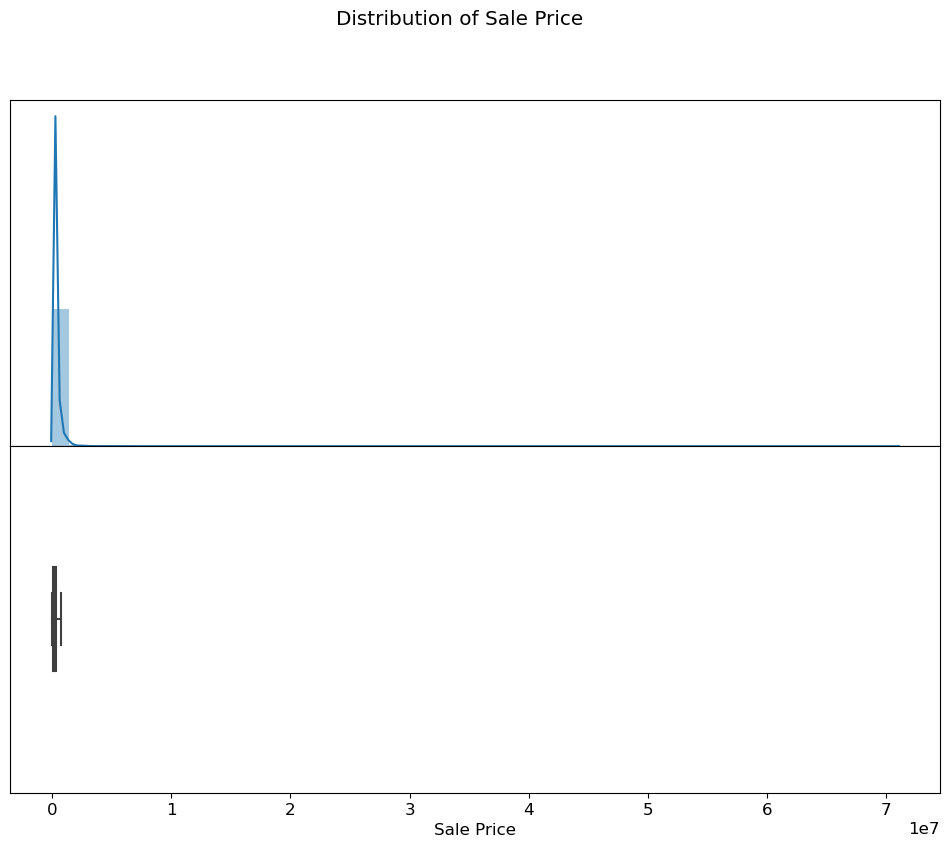

In [8]:
plot_distribution(training_data, label='Sale Price')

In [9]:
training_data['Sale Price'].describe()

count    2.047920e+05
mean     2.451646e+05
std      3.628694e+05
min      1.000000e+00
25%      4.520000e+04
50%      1.750000e+05
75%      3.120000e+05
max      7.100000e+07
Name: Sale Price, dtype: float64

The distribution of Sale Price in the above visualization is heavily skewed to the right. This means that there are a small number of houses with extremely high sale prices, which can make determining the distribution of sale prices for the majority of houses difficult. One solution is to apply a logarithmic transformation to the Sale Price variable. This will narrow the range of high sale prices while widening the range of low sale prices, making the distribution easier to visualize. We can do this by taking the natural logarithm of the Sale Price variable with the np.log() function.

#### Data Preparation: Log Transformation and Price Filtering

To focus on a subset of `Sale Price` and improve the visualization, I'll make the following modifications to the `training_data` dataframe:

1. **Filter Prices:** Keep only households with a sale price of at least $500.
2. **Log Transformation:** Add a new column, `Log Sale Price`, containing the log-transformed sale prices. This transformation will help in analyzing the distribution more effectively.

**Important:** The original `Sale Price` column should remain in the dataframe as it will be useful for subsequent analyses. 

To implement these changes, I will use the following code:



In [10]:
training_data = training_data[training_data['Sale Price'] >= 500]
training_data['Log Sale Price'] = np.log(training_data['Sale Price'])

I created a new distribution plot on the log-transformed sale price. As a sanity check, I saw that the distribution for the Log Scale Price is much more uniform.

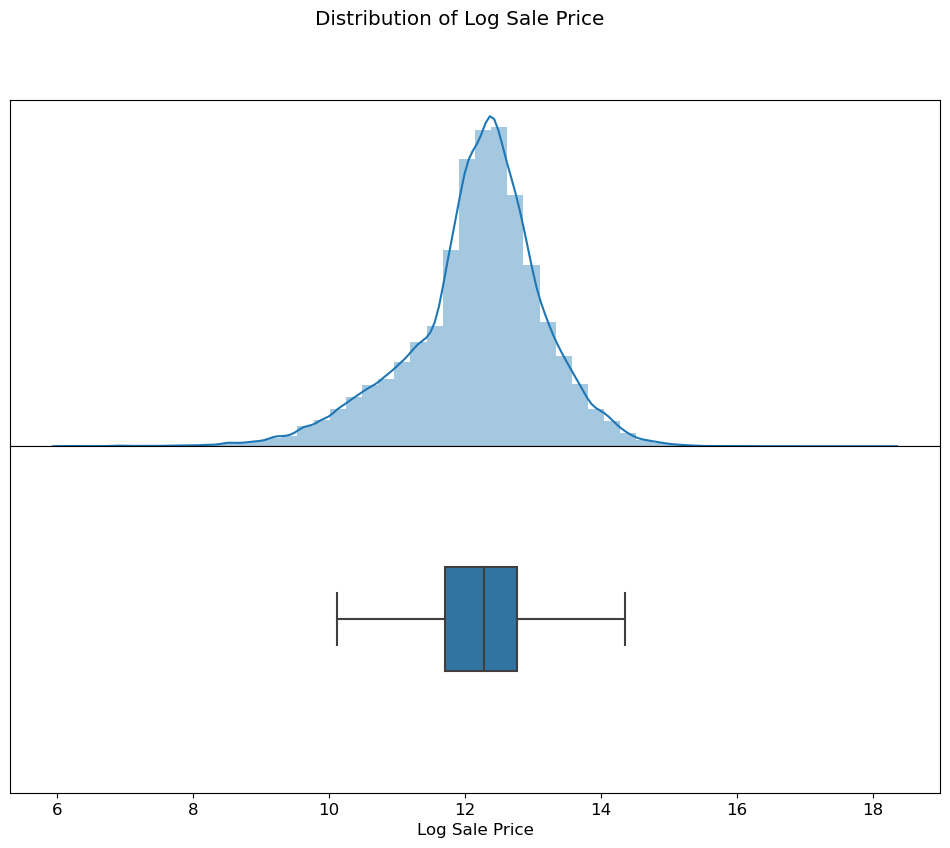

In [11]:
plot_distribution(training_data, label='Log Sale Price');

#### Exploring Correlation Between `Log Sale Price` and `Building Square Feet`

To investigate the correlation between `Log Sale Price` and the total area occupied by the property, I referred to the `codebook.txt` file. The `Building Square Feet` column measures "(from the exterior) the total area, in square feet, occupied by the building".

To make this analysis more effective, I applied a log transformation to the `Building Square Feet` column.

In the following cell, I created a new column `Log Building Square Feet` in the `training_data` that contains the log-transformed area occupied by each property.

In [12]:
training_data['Log Building Square Feet'] = np.log(training_data['Building Square Feet'])

In the visualization below, I created a `jointplot` with `Log Building Square Feet` on the x-axis, and `Log Sale Price` on the y-axis. In addition, I fit a simple linear regression line through the bivariate scatter plot in the middle.

The jointplot reveals a positive linear correlation between Log Building Square Feet and Log Sale Price. As the building's square footage increases, there's a corresponding rise in its sale price. The concentration of data points around the regression line indicates a significant association between the two variables. Given the linearity observed, it would be beneficial to incorporate this variable in a linear regression analysis. Overall, the plot suggests that Log Building Square Feet might serve as an effective predictor in our model.

![Joint Plot](images/q2p3_jointplot.png)


#### Removing Outliers

As I explored the dataset, I encountered outliers that hindered clear visualization and capturing the trend of the majority of the houses. To address this, I implemented a function `remove_outliers` that removes outliers based on a threshold value of a variable.

For example, `remove_outliers(training_data, 'Building Square Feet', lower=500, upper=8000)` should return a copy of `data` with only observations that satisfy `Building Square Feet` less than or equal to 8000 (inclusive) and `Building Square Feet` greater than 500 (exclusive).

In [13]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    """
    Input:
      data (DataFrame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than or equal to this will be removed
      upper (numeric): observations with values higher than this will be removed
    
    Output:
      a DataFrame with outliers removed
    """  
    new_df = data.loc[(data[variable] > lower) & (data[variable] <= upper)]
    return new_df

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

## Part 3: Feature Engineering

In this section, I will walk you through a few feature engineering techniques.

#### Bedrooms

Let's start simple by extracting the total number of bedrooms as our first feature for the model. The `Bedrooms` column doesn't actually exist in the original `DataFrame`. Instead, it is part of the `Description` column.

To begin, I took a closer look at the `Description` column and compared the descriptions across a few rows. I aimed to determine how many variables could be extracted from the `Description` column. I identified which ones could be extracted.

1. The date the property was sold on.
2. The number of stories the property contains.
3. The address of the property.
4. The total number of rooms inside the property.
5. The total number of bedrooms inside the property.
6. The total number of bathrooms inside the property.

In [14]:
training_data.loc[1, 'Description']

'This property, sold on 05/23/2018, is a one-story houeshold located at 2844 N LOWELL AVE.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.'

#### Adding Total Bedrooms

To proceed with feature engineering, I wrote a function `add_total_bedrooms(data)` that returns a copy of `data` with an additional column called `Bedrooms` containing the total number of bedrooms (as integers) for each house. If necessary, I treated missing values as zeros. I utilized vectorized code to achieve this without using any `for` statements.

I considered inspecting the `Description` column to identify any general structure within the text. Once I noticed a certain pattern, I used the power of Regex to extract the information.


In [15]:
import re

def add_total_bedrooms(data):
    """
    Input:
      data (DataFrame): a DataFrame containing at least the Description column.

    Output:
      a Dataframe with a new column "Bedrooms" containing ints.

    """
    with_rooms = data.copy()
    regex_pattern = r'(\d+) of which are bedrooms' 
    with_rooms['Bedrooms'] = with_rooms['Description'].apply(lambda x: int(re.findall(regex_pattern, x)[0] if re.findall(regex_pattern, x) else 0)) 
    return with_rooms

training_data = add_total_bedrooms(training_data)
training_data

PIN  Property Class  Neighborhood Code  Land Square Feet  \
1       13272240180000             202                120            3780.0   
2       25221150230000             202                210            4375.0   
3       10251130030000             203                220            4375.0   
4       31361040550000             202                120            8400.0   
6       30314240080000             203                181           10890.0   
...                ...             ...                ...               ...   
204787  25163010260000             202                321            4375.0   
204788   5063010090000             204                 21           16509.0   
204789  16333020150000             202                 90            3810.0   
204790   9242030500000             203                 80            6650.0   
204791  19102030080000             203                 30            2500.0   

        Town Code  Apartments  Wall Material  Roof Material  Basement  \
1              71         0.0            2.0            1.0       1.0   
2              70         0.0            2.0            1.0       2.0   
3              17         0.0            3.0            1.0       1.0   
4              32         0.0            3.0            1.0       2.0   
6              37         0.0            1.0            1.0       1.0   
...           ...         ...            ...            ...       ...   
204787         72         0.0            2.0            1.0       1.0   
204788         23         0.0            1.0            1.0       1.0   
204789         15         0.0            2.0            1.0       1.0   
204790         22         0.0            2.0            1.0       1.0   
204791         72         0.0            1.0            1.0       1.0   

        Basement Finish  ...  Age Decade  Pure Market Filter  \
1                   1.0  ...         9.6                   1   
2                   3.0  ...        11.2                   1   
3                   3.0  ...         6.3                   1   
4                   3.0  ...         6.3                   1   
6                   3.0  ...        10.9                   1   
...                 ...  ...         ...                 ...   
204787              1.0  ...         5.8                   1   
204788              1.0  ...         9.3                   1   
204789              1.0  ...         5.9                   1   
204790              3.0  ...         6.0                   1   
204791              3.0  ...         4.7                   1   

        Garage Indicator  Neigborhood Code (mapping)  Town and Neighborhood  \
1                    1.0                         120                  71120   
2                    1.0                         210                  70210   
3                    1.0                         220                  17220   
4                    1.0                         120                  32120   
6                    1.0                         181                  37181   
...                  ...                         ...                    ...   
204787               1.0                         321                  72321   
204788               1.0                          21                   2321   
204789               1.0                          90                   1590   
204790               1.0                          80                   2280   
204791               0.0                          30                   7230   

                                              Description  Lot Size  \
1       This property, sold on 05/23/2018, is a one-st...    3780.0   
2       This property, sold on 02/18/2016, is a one-st...    4375.0   
3       This property, sold on 07/23/2013, is a one-st...    4375.0   
4       This property, sold on 06/10/2016, is a one-st...    8400.0   
6       This property, sold on 10/26/2017, is a one-st...   10890.0   
...                                              

#### Visualizing the Association Between `Bedrooms` and `Log Sale Price`

To explore the association between `Bedrooms` and `Log Sale Price`, I created a visualization that clearly and succinctly shows their relationship. To ensure the visualization is effective, I adhered to the following requirements:
- Avoided overplotting.
- Included clearly labeled axes and a succinct title.
- Conveyed the strength of the correlation between `Log Sale Price` and the number of rooms, allowing for an easy description of the general relationship.

A direct scatter plot of the `Sale Price` against the number of rooms for all households in the training data might risk overplotting. I chose to create a scatter plot with a slight transparency and a trend line to convey the relationship effectively.


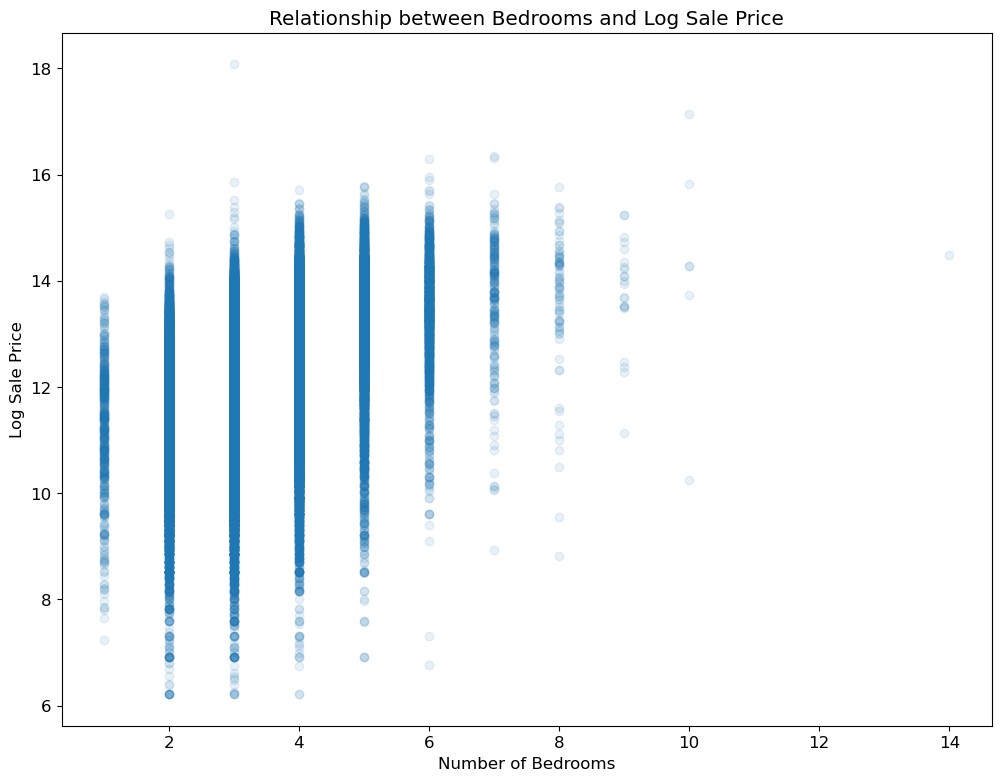

In [16]:
plt.scatter(training_data['Bedrooms'], training_data['Log Sale Price'], alpha=0.1)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log Sale Price')
plt.title('Relationship between Bedrooms and Log Sale Price')
plt.show()

In [17]:
#Verifying the outlier in the graph above
training_data[training_data['Bedrooms'] == 14]

PIN  Property Class  Neighborhood Code  Land Square Feet  \
18292  17061180350000             209                152            6600.0   

       Town Code  Apartments  Wall Material  Roof Material  Basement  \
18292         77         0.0            3.0            1.0       2.0   

       Basement Finish  ...  Age Decade  Pure Market Filter  Garage Indicator  \
18292              3.0  ...        14.6                   1               1.0   

       Neigborhood Code (mapping)  Town and Neighborhood  \
18292                         152                  77152   

                                             Description  Lot Size  \
18292  This property, sold on 01/11/2018, is a three-...    6600.0   

       Log Sale Price  Log Building Square Feet  Bedrooms  
18292       14.485901                  8.948976        14  

[1 rows x 65 columns]

#### Exploring the Relationship Between Neighborhood and Sale Prices

Next, I examined the relationship between neighborhood and sale prices of the houses in our dataset. Currently, we don't have the actual names for the neighborhoods. Instead, I used a similar column `Neighborhood Code`, which is a numerical encoding of the actual neighborhoods by the Assessment office.

To understand the impact of different neighborhoods on sale prices, I created a visualization showing the average sale prices for each neighborhood code.

Before creating any visualization, I inspected how many different neighborhoods we are dealing with.

In [18]:
num_neighborhoods = len(training_data['Neighborhood Code'].unique())
num_neighborhoods

193

If I directly plot the distribution of `Log Sale Price` for all households in each neighborhood using the `plot_categorical` function, I would get the following visualization:


![overplot](images/q5p2_catplot.png)


In [19]:
def plot_categorical(neighborhoods):
    fig, axs = plt.subplots(nrows=2)

    sns.boxplot(
        x='Neighborhood Code',
        y='Log Sale Price',
        data=neighborhoods,
        ax=axs[0],
    )

    sns.countplot(
        x='Neighborhood Code',
        data=neighborhoods,
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=training_data['Log Sale Price'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.01)

#### Handling Overplotting by Focusing on Top 20 Neighborhoods

I encountered the issue of overplotting again due to the large number of neighborhoods in our dataset. For clarity, I decided to zoom in on a subset of neighborhoods. To achieve this, I focused on the top 20 most populous neighborhoods. 

I defined the "top 20 neighborhoods" as the 20 neighborhood codes with the greatest number of properties within them. I then assigned the variable `in_top_20_neighborhoods` to a copy of `training_data` that contains only rows corresponding to properties in these neighborhoods.


In [20]:
top_20_neighborhood_codes = training_data['Neighborhood Code'].value_counts().head(20).index
in_top_20_neighborhoods = training_data[training_data['Neighborhood Code'].isin(top_20_neighborhood_codes)]

I created another distribution of the sale price within in each neighborhood again, but this time with a narrower focus!

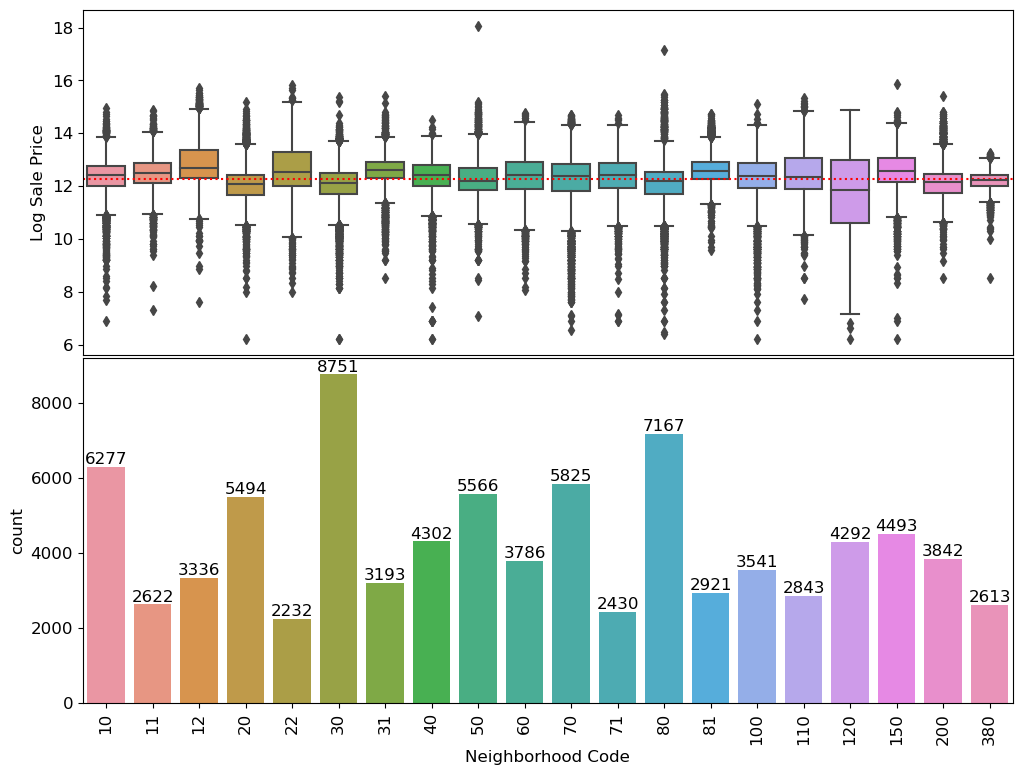

In [21]:
plot_categorical(neighborhoods=in_top_20_neighborhoods)

#### Binning Neighborhoods by Expense

From the previous plot, I noticed that some neighborhoods have significantly less data available. For example, Neighborhood 71 has only around 27% of the data points as Neighborhood 30.

To address the lack of data from some neighborhoods, I decided to create a new feature that bins neighborhoods together. This approach allows for a more balanced analysis by categorizing neighborhoods in a crude way. 

In the following steps, I will compute how “expensive” each neighborhood is by aggregating the `Log Sale Price`s for all properties in a particular neighborhood using a metric, such as the median. I will use this metric to find the top `n` most expensive neighborhoods and label these “expensive neighborhoods,” leaving all other neighborhoods unmarked.

Here's the function `find_expensive_neighborhoods` that returns a **list** of the neighborhood codes of the **top `n`** most expensive neighborhoods as measured by our choice of aggregating function, `metric`.


In [22]:
def find_expensive_neighborhoods(data, n=3, metric=np.median):
    """
    Input:
      data (DataFrame): should contain at least a int-valued 'Neighborhood Code'
        and a numeric 'Log Sale Price' column
      n (int): the number of top values desired
      metric (function): function used for aggregating the data in each neighborhood.
        for example, np.median for median prices
    
    Output:
      a list of the the neighborhood codes of the top n highest-priced neighborhoods 
      as measured by the metric function
    """
    neighborhoods = data.groupby('Neighborhood Code')['Log Sale Price'].agg(
        metric).sort_values(ascending=False).index[:n].tolist()
    
    # This makes sure the final list contains the generic int type used in Python3, not specific ones used in numpy.
    return [int(code) for code in neighborhoods]

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
expensive_neighborhoods

[44, 94, 93]

#### Creating an Indicator Variable for Expensive Neighborhoods

Having identified a list of neighborhoods deemed higher-priced than others, I used that information to write an additional function `add_expensive_neighborhood`. This function takes in a `DataFrame` of housing data (`data`) and a list of neighborhood codes considered to be expensive (`expensive_neighborhoods`). The `expensive_neighborhoods` list is the output of the function `find_expensive_neighborhoods`.

Using these inputs, the `add_expensive_neighborhood` function adds a column to `data` named `in_expensive_neighborhood`. This column takes on the **integer** value of 1 if a property is part of a neighborhood in `expensive_neighborhoods` and the integer value of 0 if it is not. This type of variable is known as an **indicator variable**.


In [23]:
def add_in_expensive_neighborhood(data, expensive_neighborhoods):
    """
    Input:
      data (DataFrame): a DataFrame containing a 'Neighborhood Code' column with values
        found in the codebook
      neighborhoods (list of strings): strings should be the names of neighborhoods
        pre-identified as expensive
    Output:
      DataFrame identical to the input with the addition of a binary
      in_expensive_neighborhood column
    """
    data['in_expensive_neighborhood'] = data['Neighborhood Code'].isin(expensive_neighborhoods).astype(int)
    return data

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
training_data = add_in_expensive_neighborhood(training_data, expensive_neighborhoods)

I will now take a closer look at the `Roof Material` feature of the dataset and examine how I can incorporate categorical features into my linear model.

#### Replacing Numerical Values in `Roof Material` with Descriptive Labels

By examining `codebook.txt`, I found that the Assessor's Office uses the following mapping for the numerical values in the `Roof Material` column:

```
Roof Material (Nominal): 

       1    Shingle/Asphalt
       2    Tar & Gravel
       3    Slate
       4    Shake
       5    Tile
       6    Other
```

To make the data more interpretable, I wrote a function `substitute_roof_material` that replaces each numerical value in `Roof Material` with its corresponding descriptive label. The function returns a new `DataFrame`, without modifying the existing `DataFrame`.



In [24]:
def substitute_roof_material(data):
    """
    Input:
      data (DataFrame): a DataFrame containing a 'Roof Material' column.  Its values
                         should be limited to those found in the codebook
    Output:
      DataFrame identical to the input except with a refactored 'Roof Material' column
    """
    materials = {
        1: 'Shingle/Asphalt',
        2: 'Tar & Gravel',
        3: 'Slate',
        4: 'Shake',
        5: 'Tile',
        6: 'Other'
    }
    return data.replace({'Roof Material': materials})
    return data
    
training_data_mapped = substitute_roof_material(training_data)
training_data_mapped.head()

PIN  Property Class  Neighborhood Code  Land Square Feet  \
1  13272240180000             202                120            3780.0   
2  25221150230000             202                210            4375.0   
3  10251130030000             203                220            4375.0   
4  31361040550000             202                120            8400.0   
6  30314240080000             203                181           10890.0   

   Town Code  Apartments  Wall Material    Roof Material  Basement  \
1         71         0.0            2.0  Shingle/Asphalt       1.0   
2         70         0.0            2.0  Shingle/Asphalt       2.0   
3         17         0.0            3.0  Shingle/Asphalt       1.0   
4         32         0.0            3.0  Shingle/Asphalt       2.0   
6         37         0.0            1.0  Shingle/Asphalt       1.0   

   Basement Finish  ...  Pure Market Filter  Garage Indicator  \
1              1.0  ...                   1               1.0   
2              3.0  ...                   1               1.0   
3              3.0  ...                   1               1.0   
4              3.0  ...                   1               1.0   
6              3.0  ...                   1               1.0   

   Neigborhood Code (mapping)  Town and Neighborhood  \
1                         120                  71120   
2                         210                  70210   
3                         220                  17220   
4                         120                  32120   
6                         181                  37181   

                                         Description  Lot Size  \
1  This property, sold on 05/23/2018, is a one-st...    3780.0   
2  This property, sold on 02/18/2016, is a one-st...    4375.0   
3  This property, sold on 07/23/2013, is a one-st...    4375.0   
4  This property, sold on 06/10/2016, is a one-st...    8400.0   
6  This property, sold on 10/26/2017, is a one-st...   10890.0   

   Log Sale Price  Log Building Square Feet  Bedrooms  \
1       12.560244                  6.904751         3   
2        9.998798                  6.810142         3   
3       12.323856                  7.068172         3   
4       10.025705                  6.855409         2   
6       11.512925                  7.458186         4   

   in_expensive_neighborhood  
1                          0  
2                          0  
3                          0  
4                          0  
6                          0  

[5 rows x 66 columns]

#### One-Hot Encoding for `Roof Material`

Simply replacing the integers with the appropriate strings isn’t sufficient for using `Roof Material` in my model. Since `Roof Material` is a categorical variable, I need to one-hot-encode the data.

I completed the following function `ohe_roof_material` that returns a `DataFrame` with the new column one-hot-encoded on the roof material of the household. These new columns have the form `Roof Material_MATERIAL`. The function returns a new `DataFrame` and **does not modify the existing `DataFrame`**.

I used Scikit-learn’s `OneHotEncoder` to perform the one-hot-encoding. `OneHotEncoder` automatically generates column names of the form `Roof Material_MATERIAL`.

In [25]:
from sklearn.preprocessing import OneHotEncoder

def ohe_roof_material(data):
    """
    One-hot-encodes roof material. New columns are of the form "Roof Material_MATERIAL".
    """
    ohe = OneHotEncoder()
    ohe.fit(data[['Roof Material']])
    roof_material_ohe = ohe.transform(data[['Roof Material']]).toarray()
    roof_material_ohe_df = pd.DataFrame(data=roof_material_ohe, columns=ohe.get_feature_names_out(), index = data.index)
    return data.join(roof_material_ohe_df)

training_data_ohe = ohe_roof_material(training_data_mapped)
# This line of code will display only the one-hot-encoded columns in training_data_ohe that 
# have names that begin with “Roof Material_" 
training_data_ohe.filter(regex='^Roof Material_').head(10)

Roof Material_Other  Roof Material_Shake  Roof Material_Shingle/Asphalt  \
1                   0.0                  0.0                            1.0   
2                   0.0                  0.0                            1.0   
3                   0.0                  0.0                            1.0   
4                   0.0                  0.0                            1.0   
6                   0.0                  0.0                            1.0   
7                   0.0                  0.0                            1.0   
8                   0.0                  0.0                            0.0   
9                   0.0                  0.0                            1.0   
10                  0.0                  0.0                            1.0   
11                  0.0                  0.0                            1.0   

    Roof Material_Slate  Roof Material_Tar & Gravel  Roof Material_Tile  
1                   0.0                         0.0                 0.0  
2                   0.0                         0.0                 0.0  
3                   0.0                         0.0                 0.0  
4                   0.0                         0.0                 0.0  
6                   0.0                         0.0                 0.0  
7                   0.0                         0.0                 0.0  
8                   0.0                         1.0                 0.0  
9                   0.0                         0.0                 0.0  
10                  0.0                         0.0                 0.0  
11                  0.0                         0.0                 0.0

# Section 2: Predicting Housing Prices in Cook County



<hr style="border: 1px solid #fdb515;" />
<hr style="border: 5px solid #003262;" />
<br/><br/>

In the previous steps, I performed some basic Exploratory Data Analysis (EDA), laying out the thought process that leads to certain modeling decisions. I also added a few new features to the dataset and cleaned the data in the process.

In this section, I will specify and fit a linear model to a few features of the housing data to predict house prices. Next, I will analyze the error of the model and brainstorm ways to improve the model's performance. Finally, I will delve deeper into the implications of predictive modeling within the Cook County Assessor's Office (CCAO), especially because statistical modeling is how the CCAO valuates properties. Given the history of racial discrimination in housing policy and property taxation in Cook County, it is important to consider the impacts of the modeling results and think about what fairness might mean to property owners in Cook County.

In [26]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

from ds100_utils import run_linear_regression_test
from feature_func import *

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

Let's load training, validation, and test data.

In [29]:
with zipfile.ZipFile('cook_county_data.zip') as item:
    item.extractall()

#### Data Splitting and Loading

This dataset is split into a training/validation set and a testing set. Importantly, the test set does not contain values for our target variable, `Sale Price`. In this section, I will train a model on the training/validation set and then use this model to predict the `Sale Price`s of the test set.

In the cell below, I loaded the training/validation set into the `DataFrame` `training_val_data` and the test set into the `DataFrame` `test_data`.

In [30]:
training_val_data = pd.read_csv("cook_county_train_val.csv", index_col='Unnamed: 0')
test_data = pd.read_csv("cook_county_contest_test.csv", index_col='Unnamed: 0')

As a good sanity check, I verified that the data shape matches the description.

In [31]:
# 204792 observations and 62 features in training data
assert training_val_data.shape == (204792, 62)
# 55311 observations and 61 features in test data
assert test_data.shape == (55311, 61)
# Sale Price is provided in the training/validation data
assert 'Sale Price' in training_val_data.columns.values
# Sale Price is hidden in the test data
assert 'Sale Price' not in test_data.columns.values

In [32]:
training_val_data.columns.values

array(['PIN', 'Property Class', 'Neighborhood Code', 'Land Square Feet',
       'Town Code', 'Apartments', 'Wall Material', 'Roof Material',
       'Basement', 'Basement Finish', 'Central Heating', 'Other Heating',
       'Central Air', 'Fireplaces', 'Attic Type', 'Attic Finish',
       'Design Plan', 'Cathedral Ceiling', 'Construction Quality',
       'Site Desirability', 'Garage 1 Size', 'Garage 1 Material',
       'Garage 1 Attachment', 'Garage 1 Area', 'Garage 2 Size',
       'Garage 2 Material', 'Garage 2 Attachment', 'Garage 2 Area',
       'Porch', 'Other Improvements', 'Building Square Feet',
       'Repair Condition', 'Multi Code', 'Number of Commercial Units',
       'Estimate (Land)', 'Estimate (Building)', 'Deed No.', 'Sale Price',
       'Longitude', 'Latitude', 'Census Tract',
       'Multi Property Indicator', 'Modeling Group', 'Age', 'Use',
       "O'Hare Noise", 'Floodplain', 'Road Proximity', 'Sale Year',
       'Sale Quarter', 'Sale Half-Year', 'Sale Quarter of Year'

#### Human Context and Ethics

In this part of the project, I will explore the human context of the housing dataset.

"How much is a house worth?" Who might be interested in an answer to this question? **I listed at least three different parties (people or organizations) and stated whether each one has an interest in seeing the housing price be high or low.**

- **Homeowners:** The worth of their property is crucial as it represents a major investment. Should they consider selling, a high property value would mean a potential for greater returns. Conversely, if they're in the market to purchase another property, a lower value would be beneficial for a favorable deal.
- **Real Estate Agents:** The value of homes directly impacts their earnings since their commission is derived from the property's sale price. Naturally, a higher property value would lead to a heftier commission.
- **Potential Buyers:** They look at the value of a house to gauge whether they're getting their money's worth. They'd prefer a lower valuation to secure a good deal. Homeowners, in contrast, would favor a higher value to maximize their gains.


**The CCAO Dataset**

I worked with the dataset from the Cook County Assessor's Office (CCAO) in Illinois. This government institution determines property taxes across most of Chicago's metropolitan areas and nearby suburbs. In the United States, all property owners must pay property taxes, which are then used to fund public services, including education, road maintenance, and sanitation. These property tax assessments are based on property values estimated using statistical models considering multiple factors, such as real estate value and construction cost.


This system, however, is not without flaws. In late 2017, a lawsuit was filed against the office of Cook County Assessor Joseph Berrios for producing "[racially discriminatory assessments and taxes](https://www.chicagotribune.com/politics/ct-cook-county-board-assessor-berrios-met-20170718-story.html)." The lawsuit included claims that the assessor's office undervalued high-priced homes and overvalued low-priced homes, creating a visible divide along racial lines: Wealthy homeowners, who were typically white, [paid less in property taxes](https://fix8media-chicago.squarespace.com/bpnc-v-berrios-resource-page), whereas [working-class, non-white homeowners paid more](https://www.chicagotribune.com/news/breaking/ct-cook-county-assessor-berrios-sued-met-20171214-story.html).


The Chicago Tribune's four-part series, "[The Tax Divide](https://www.chicagotribune.com/investigations/ct-tax-divide-investigation-20180425-storygallery.html)", delves into how this was uncovered: After "compiling and analyzing more than 100 million property tax records from the years 2003 through 2015, along with thousands of pages of documents, then vetting the findings with top experts in the field," they discovered that "residential assessments had been so far off the mark for so many years." You can read more about their investigation [here](https://apps.chicagotribune.com/news/watchdog/cook-county-property-tax-divide/assessments.html).

The former property tax system in Cook County was biased, disadvantaging working-class homeowners of color. This system had a fundamental defect: it overestimated the value of lower-priced homes and underestimated that of pricier ones. This led to a clear disparity where affluent, predominantly white homeowners paid lower property taxes, whereas working-class homeowners of color paid more. This discrepancy stemmed from inaccurate statistical models used by the assessor's office and a lack of openness and responsibility in their evaluation methods. Additionally, there were allegations of political bias and vested interests within the office.

Based on an investigation by the Chicago Tribune, the property tax system in Cook County was found to be not only regressive but also unfairly burdensome to property owners of color. The findings revealed that the assessor's office had a tendency to undervalue expensive homes and overvalue less expensive ones, predominantly owned by non-white residents. Consequently, homeowners of color were charged higher property taxes than their white counterparts with similarly valued properties. This clearly indicated racial bias in the property tax assessment process.

#### Preparing Data

To evaluate how well our model will perform on unseen data, we need to split the dataset into a training set and a validation set. The training set will be used to fit the model's parameters, and the validation set will be used to assess the model's performance on unseen data drawn from the same distribution. If we used all the data to fit our model, we would not have a way to estimate model performance on **unseen data** such as the test set in `cook_county_contest_test.csv`.

In the cell below, I completed the function `train_val_split` that splits `data` into two smaller `DataFrame`s named `train` and `validation`. The `train` set contains 80% of the data, while the `validation` set contains the remaining 20%. 

In [33]:
np.random.seed(1337)

def train_val_split(data):
    """ 
    Takes in a DataFrame `data` and randomly splits it into two smaller DataFrames 
    named `train` and `validation` with 80% and 20% of the data, respectively. 
    """
    
    data_len = data.shape[0]
    shuffled_indices = np.random.permutation(data_len)
    i_train = shuffled_indices[:int(data_len*0.8)]
    v_indices = shuffled_indices[int(data_len*0.8):]
    train = data.iloc[i_train]
    validation = data.iloc[v_indices]
   
    return train, validation
train, validation = train_val_split(training_val_data)

#### Fitting a Simple Model

I fit my linear regression model using the ordinary least squares estimator! I start with something simple by using only two features: the **number of bedrooms** in the household and the **log-transformed total area covered by the building** (in square feet). 

I consider the following expression for my 1st linear model that contains one of the features:

$$
\text{Log Sale Price} = \theta_0 + \theta_1 \cdot (\text{Bedrooms})
$$

In parallel, I will also consider a 2nd model that contains both features:

$$
\text{Log Sale Price} = \theta_0 + \theta_1 \cdot (\text{Bedrooms}) + \theta_2 \cdot (\text{Log Building Square Feet})
$$

#### Pipeline function

In Section 1, I wrote a few functions that added features to the dataset. Instead of calling them manually one by one each time, it is best practice to encapsulate all of this feature engineering into one "pipeline" function. Defining and using a pipeline reduces all the feature engineering to just one function call and ensures that the same transformations are applied to all data. Below, I combined some functions into a single helper function that outputs `X` and `Y` for the first model above. 

In [34]:
from feature_func import *


def process_data_simple(data):
    # Remove outliers
    data = remove_outliers(data, 'Sale Price', lower=499)
    # Create Log Sale Price column
    data = log_transform(data, 'Sale Price')
    # Create Bedroom column
    data = add_total_bedrooms(data)
    # Select X and Y from the full data
    X = data[['Bedrooms']]
    Y = data['Log Sale Price']
    return X, Y

# Reload the data
full_data = pd.read_csv("cook_county_train.csv")

# Process the data using the pipeline for the first model.
np.random.seed(1337)
train_m1, valid_m1 = train_val_split(full_data)
X_train_m1_simple, Y_train_m1_simple = process_data_simple(train_m1)
X_valid_m1_simple, Y_valid_m1_simple = process_data_simple(valid_m1)

# Take a look at the result
display(X_train_m1_simple.head())
display(Y_train_m1_simple.head())

Bedrooms
130829         4
193890         2
30507          2
91308          2
131132         3

130829    12.994530
193890    11.848683
30507     11.813030
91308     13.060488
131132    12.516861
Name: Log Sale Price, dtype: float64

#### `.pipe`

Alternatively, I can build the pipeline using `pd.DataFrame.pipe` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pipe.html)). Take a look at the use of `pd.DataFrame.pipe` below.

The following function `process_data_pipe` takes in a `DataFrame` `data`, a list `pipeline_functions` containing 3-element tuples `(function, arguments, keyword_arguments)` that will be called on `data` in the pipeline, and the label `prediction_col` that represents the column of our target variable (`Sale Price` in this case). This function can be used with each of the tuples passed in through `pipeline_functions`.

In [35]:
def process_data_pipe(data, pipeline_functions, prediction_col):
    """Process the data for a guided model."""
    for function, arguments, keyword_arguments in pipeline_functions:
        if keyword_arguments and (not arguments):
            data = data.pipe(function, **keyword_arguments)
        elif (not keyword_arguments) and (arguments):
            data = data.pipe(function, *arguments)
        else:
            data = data.pipe(function)
    X = data.drop(columns=[prediction_col])
    Y = data.loc[:, prediction_col]
    return X, Y

#### Preparing Training and Validation Data

It's time to prepare the training and validation data for the two models I proposed above. I'll reload a fresh dataset from scratch and run it through the following preprocessing steps using `process_data_pipe` for each model:

- Perform a `train_val_split` on the original dataset, loaded as the `DataFrame` `full_data`. I'll let 80% of the set be training data and 20% be validation data.
- For both the training and validation sets:
    1. Remove outliers in `Sale Price` so that I consider households with a price that is strictly greater than 499 dollars (i.e., greater than or equal to 500 dollars).
    2. Apply log transformations to the `Sale Price` and the `Building Square Feet` columns to create two new columns, `Log Sale Price` and `Log Building Square Feet`.
    3. Extract the total number of bedrooms into a new column `Bedrooms` from the `Description` column.
    4. Select the columns `Log Sale Price` and `Bedrooms` (and `Log Building Square Feet` if this is the 2nd model). I've implemented the helper function `select_columns` for this.
    5. Return the design matrix $\mathbb{X}$ and the observed vector $\mathbb{Y}$. Note that $\mathbb{Y}$ refers to the transformed `Log Sale Price`, not the original `Sale Price`. **My design matrix and observed vector should be `NumPy` arrays or `pandas` DataFrames**.

I'll assign the final training data and validation data for both models to the following set of variables:

- 1st Model: `X_train_m1`, `Y_train_m1`, `X_valid_m1`, `Y_valid_m1`. This is already implemented for me.
- 2nd Model: `X_train_m2`, `Y_train_m2`, `X_valid_m2`, `Y_valid_m2`. I'll implement this in the second cell below. I may use the first model as an example.

For an example of how to work with pipelines, I've processed m1 using `m1_pipelines` by passing in the corresponding pipeline functions as a list of tuples in the cell below. My task is to do the same for model 2 in the following cell - that is, save my pipeline functions as a list of tuples and assign it to `m2_pipelines` for model 2.

As a refresher, the equations for model 1 and model 2, respectively, can be found below:
$$
\text{Log Sale Price} = \theta_0 + \theta_1 \cdot (\text{Bedrooms})
$$

$$
\text{Log Sale Price} = \theta_0 + \theta_1 \cdot (\text{Bedrooms}) + \theta_2 \cdot (\text{Log Building Square Feet})
$$

In [36]:
# Reload the data
full_data = pd.read_csv("cook_county_train.csv")

# Process the data using the pipeline for the first model
np.random.seed(1337)
train_m1, valid_m1 = train_val_split(full_data)

# Helper function
def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

# Pipelines, a list of tuples
m1_pipelines = [
    (remove_outliers, None, {
        'variable': 'Sale Price',
        'lower': 499,
    }),
    (log_transform, None, {'col': 'Sale Price'}),
    (add_total_bedrooms, None, None),
    (select_columns, ['Log Sale Price', 'Bedrooms'], None)
]

X_train_m1, Y_train_m1 = process_data_pipe(train_m1, m1_pipelines, 'Log Sale Price')
X_valid_m1, Y_valid_m1 = process_data_pipe(valid_m1, m1_pipelines, 'Log Sale Price')

display(X_train_m1.head())
display(Y_train_m1.head())

Bedrooms
130829         4
193890         2
30507          2
91308          2
131132         3

130829    12.994530
193890    11.848683
30507     11.813030
91308     13.060488
131132    12.516861
Name: Log Sale Price, dtype: float64

In [37]:
np.random.seed(1337)

# Process the data using the pipeline for the second model
train_m2, valid_m2 = train_val_split(pd.read_csv("cook_county_train.csv"))

m2_pipelines = [
    (remove_outliers, None, {
        'variable': 'Sale Price',
        'lower': 499,
    }),
    (log_transform, None, {'col': 'Sale Price'}),
    (log_transform, None, {'col': 'Building Square Feet'}),
    (add_total_bedrooms, None, None),
    (select_columns, ['Log Sale Price', 'Bedrooms', 'Log Building Square Feet'], None)
]
X_train_m2, Y_train_m2 = process_data_pipe(train_m2, m2_pipelines, 'Log Sale Price')
X_valid_m2, Y_valid_m2 = process_data_pipe(valid_m2, m2_pipelines, 'Log Sale Price')


display(X_train_m2.head())
display(Y_train_m2.head())

Bedrooms  Log Building Square Feet
130829         4                  7.870166
193890         2                  7.002156
30507          2                  6.851185
91308          2                  7.228388
131132         3                  7.990915

130829    12.994530
193890    11.848683
30507     11.813030
91308     13.060488
131132    12.516861
Name: Log Sale Price, dtype: float64

#### Regression

I first initialize a [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) object for both of my models. I set `fit_intercept = True` to ensure that the linear model has a non-zero intercept (i.e., a bias term).

In [38]:
linear_model_m1 = lm.LinearRegression(fit_intercept=True)
linear_model_m2 = lm.LinearRegression(fit_intercept=True)

Now it's time to fit my linear regression models. I'll use the cell below to fit both models and then compute the fitted values of `Log Sale Price` over the training data, and the predicted values of `Log Sale Price` for the validation data.

I'll assign the predicted values from both of my models on the training and validation set to the following variables:

- 1st Model: predicted values on **training set**: `Y_fitted_m1`, predicted values on **validation set**: `Y_predicted_m1`
- 2nd Model: predicted values on **training set**: `Y_fitted_m2`, predicted values on **validation set**: `Y_predicted_m2`

In [39]:
# Fit the 1st model
linear_model_m1.fit(X_train_m1, Y_train_m1)
# Compute the fitted and predicted values of Log Sale Price for 1st model
Y_fitted_m1 = linear_model_m1.predict(X_train_m1)
Y_predicted_m1 = linear_model_m1.predict(X_valid_m1)

# Fit the 2nd model
linear_model_m2.fit(X_train_m2, Y_train_m2)
# Compute the fitted and predicted values of Log Sale Price for 2nd model
Y_fitted_m2 = linear_model_m2.predict(X_train_m2)
Y_predicted_m2 = linear_model_m2.predict(X_valid_m2)

#### Evaluate my Simple Model

I am moving into the analysis of my two models! I'll compare the performance of my two regression models using the Root Mean Squared Error (RMSE) function.

$$RMSE = \sqrt{\dfrac{\sum_{\text{houses in the set}}(\text{actual price for house} - \text{predicted price for house})^2}{\text{number of houses}}}$$

The function is provided below.


In [40]:
def rmse(predicted, actual):
    """
    Calculates RMSE from actual and predicted values.
    Input:
      predicted (1D array): Vector of predicted/fitted values
      actual (1D array): Vector of actual values
    Output:
      A float, the RMSE value.
    """
    return np.sqrt(np.mean((actual - predicted)**2))

One way of understanding a model's performance (and appropriateness) is through a plot of the residuals versus the observations.

In the cell below, I'll use [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to plot the residuals from predicting `Log Sale Price` using **only the 2nd model** against the original `Log Sale Price` for the **validation data**. With such a large dataset, it is difficult to avoid overplotting entirely. I will ensure that the dot size and opacity in the scatter plot are set appropriately to reduce the impact of overplotting as much as possible.

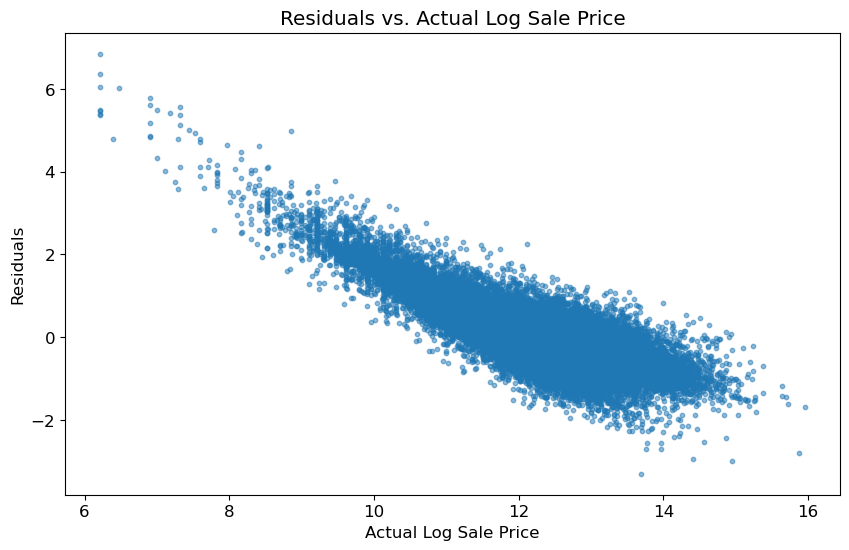

In [41]:
predicted_values_m2 = linear_model_m2.predict(X_valid_m2)
residuals_m2 = predicted_values_m2 - Y_valid_m2

plt.figure(figsize=(10, 6))
plt.scatter(Y_valid_m2, residuals_m2, alpha=0.5, s=10)
plt.title('Residuals vs. Actual Log Sale Price')
plt.xlabel('Actual Log Sale Price')
plt.ylabel('Residuals')
plt.show()

Based on the structure I see in my plot, this model seems like it will correspond to _regressive_ taxation.

#### Improving the Model

While my simple model explains some of the variability in price, there is certainly still a lot of room for improvement to be made. One reason for this is that I have only been utilizing 1 or 2 features (out of a total of 70+) so far!

#### Building My Improved Model

It's time to build my improved model!

I will process the training data using my `process_data_final` function, fit the model with this training data, and compute the training RMSE. Then, I will process the test data with my `process_data_final`, use the model to predict `Log Sale Price` for the test data, transform the predicted and original log values back into their original forms (by using `delog`), and compute the test RMSE.

My goal in this part of the project is to:

* Define a function to perform feature engineering and produce a design matrix for modeling.
* Apply this feature engineering function to the training data and use it to train a model that can predict the `Log Sale Price` of houses.
* Use this trained model to predict the `Log Sale Price`s of the test set. Remember that the test set does not contain the true `Sale Price` of each house – my model is trying to guess them!

In [42]:
# Imports all the necessary libraries again

import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

from ds100_utils import *
from feature_func import *

from sklearn.preprocessing import OneHotEncoder

#### Finding Potential Features

I read the documentation about the dataset in `codebook.txt`, located in this directory. This is data that I think may be related to housing prices.

##### Potential Features:
- **Number of Bedrooms**: As seen earlier, this has a strong correlation with the sale price.
- **Building Square Feet**: The total area of the building could be a significant factor.
- **Year Built**: Newer houses might be priced differently than older ones.
- **Lot Size**: Larger lots might increase the overall value of the property.
- **Garage Spaces**: Properties with more garage spaces might be valued higher.
- **Neighborhood Code**: The location of the property can significantly impact its value.
- **Property Condition**: The condition of the property (good, fair, poor) might affect its price.
- **Number of Bathrooms**: The number of bathrooms could also be related to the sale price.

#### Performing EDA

I performed EDA to visualize the relationships between various features and the sale price. This helped me understand the data better and informed my feature engineering decisions in the next steps.

In [43]:
# EDA code below
data = pd.read_csv('cook_county_train.csv', index_col=0)
print(data.describe())

                PIN  Property Class  Neighborhood Code  Land Square Feet  \
count  2.047920e+05   204792.000000      204792.000000      2.047920e+05   
mean   1.664208e+13      212.357856         120.493769      7.809451e+03   
std    8.161252e+12       24.097636         110.624143      1.525110e+04   
min    1.011000e+12      202.000000          10.000000      1.697381e+02   
25%    1.036224e+13      203.000000          40.000000      3.810000e+03   
50%    1.607416e+13      203.000000          81.000000      5.775000e+03   
75%    2.409123e+13      205.000000         162.000000      8.515000e+03   
max    3.332302e+13      278.000000         600.000000      2.980767e+06   

           Town Code     Apartments  Wall Material  Roof Material  \
count  204792.000000  204792.000000  204792.000000  204792.000000   
mean       44.448758       0.000230       1.900484       1.113520   
std        23.531694       0.034728       0.794124       0.593602   
min        10.000000       0.000000    

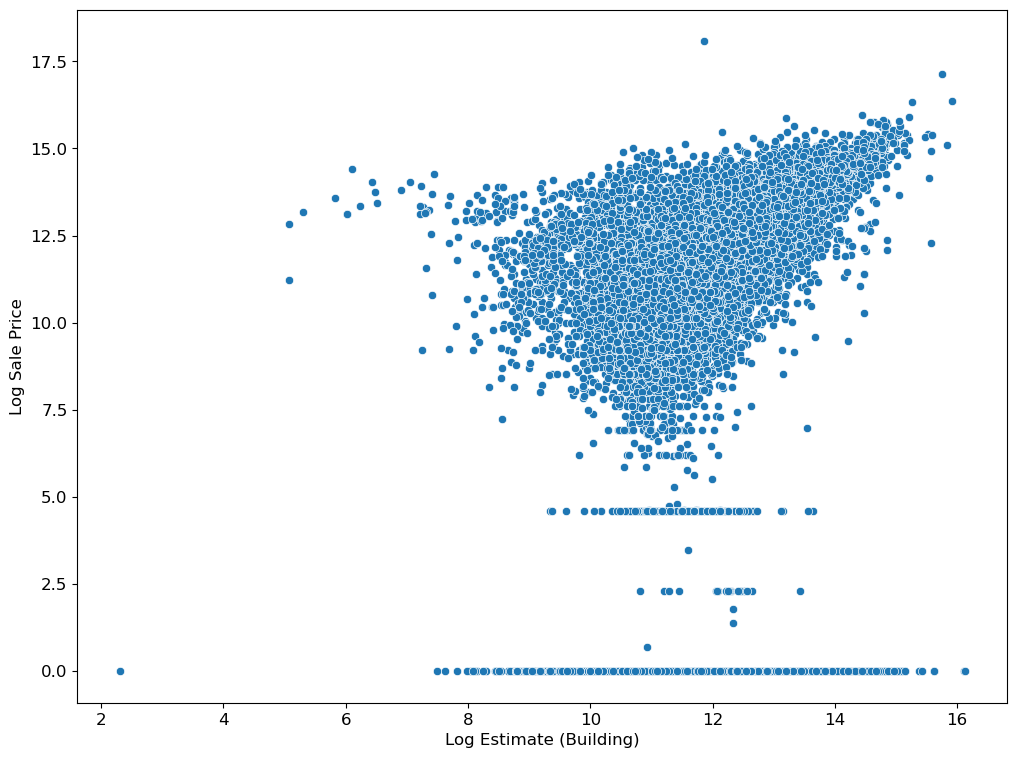

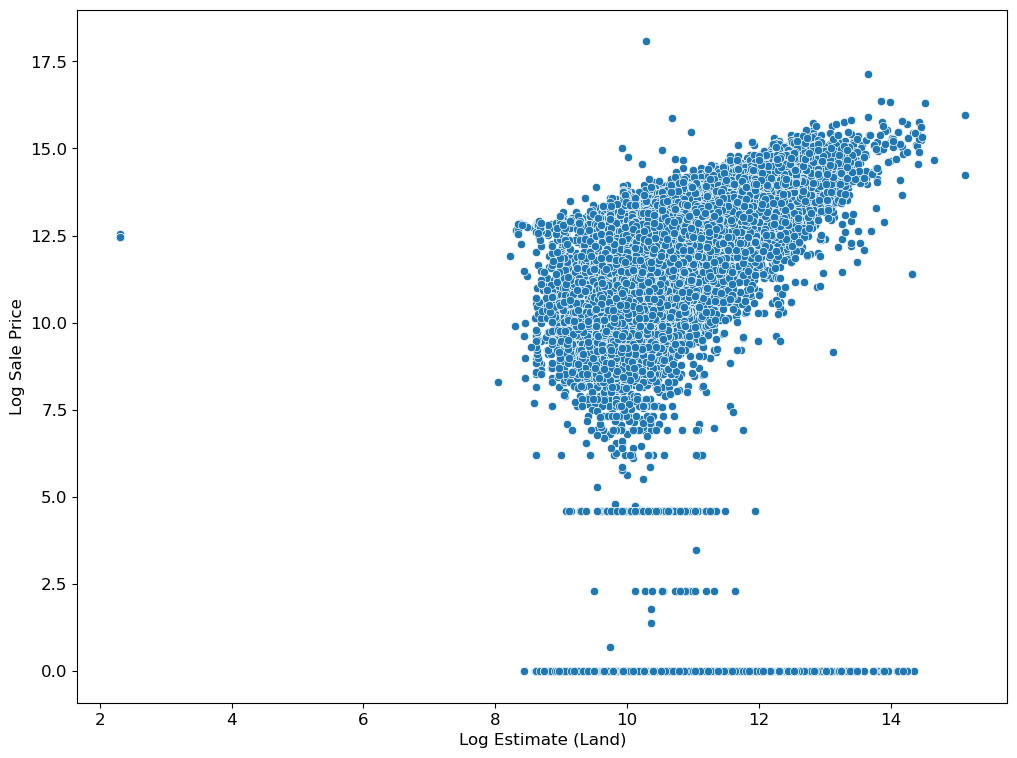

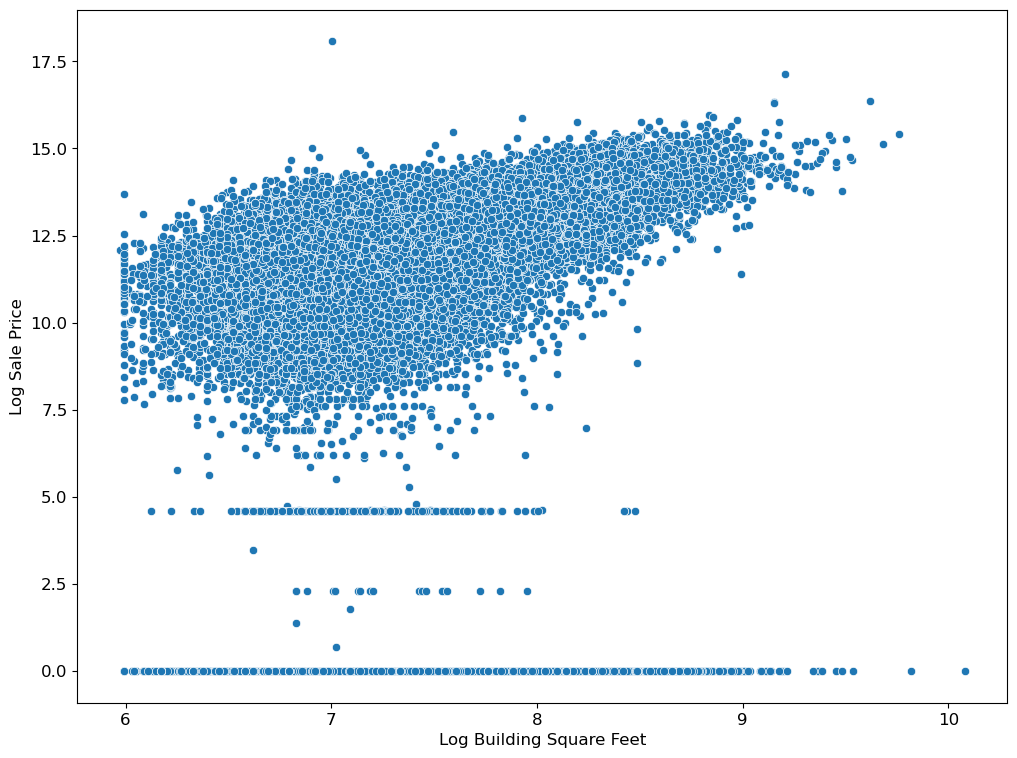

In [44]:
sns.scatterplot(x=np.log(data['Estimate (Building)']), y=np.log(data['Sale Price']))
plt.xlabel('Log Estimate (Building)')
plt.ylabel('Log Sale Price')
plt.show()

sns.scatterplot(x=np.log(data['Estimate (Land)']), y=np.log(data['Sale Price']))
plt.xlabel('Log Estimate (Land)')
plt.ylabel('Log Sale Price')
plt.show()

sns.scatterplot(x=np.log(data['Building Square Feet']), y=np.log(data['Sale Price']))
plt.xlabel('Log Building Square Feet')
plt.ylabel('Log Sale Price')
plt.show()

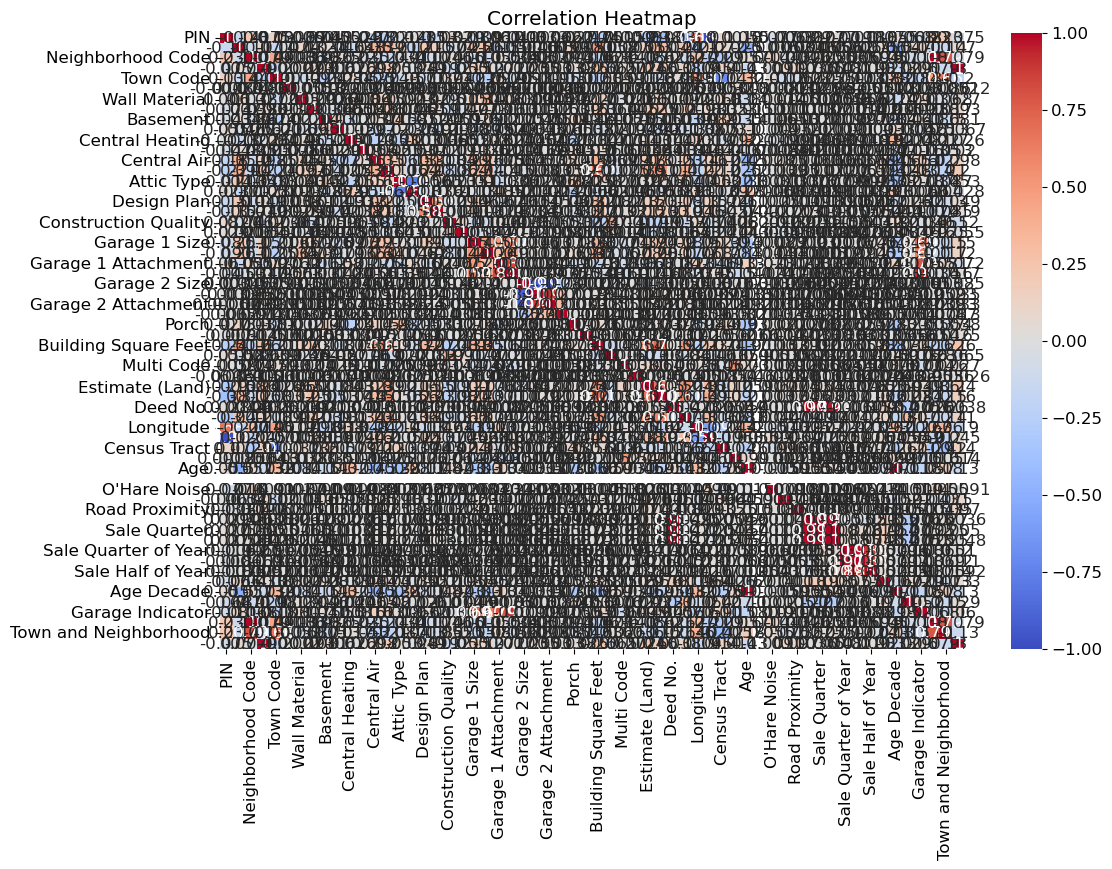

In [45]:
numeric_data = data.select_dtypes(exclude=['object'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

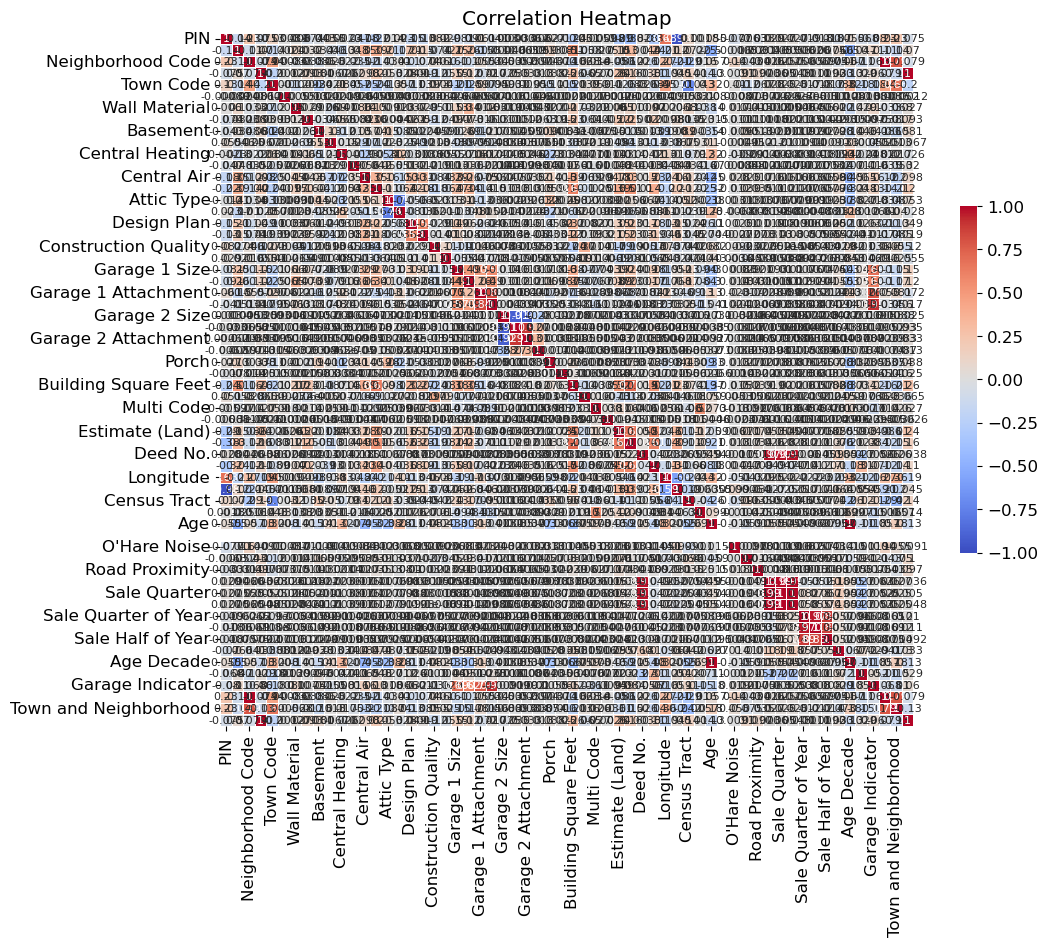

In [46]:
corr = numeric_data.corr()
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": 0.5}, annot=True, annot_kws={"size": 8})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')
plt.show()

#### Helper Functions and Variables
I used this space to define any additional helper functions I used in my final model. These were transformation functions I identified above.

In [47]:
# Additional helper functions or variables I need
def extract_rooms(data):
    data_copy = data.copy()
    data_copy["Rooms"] = data_copy["Description"].str.extract(r'.total of\s(\d+)\s*room')
    data_copy["Rooms"].fillna(value=0, inplace=True)
    return data_copy["Rooms"].astype(float)

def bathrooms(data):
    data_copy = data.copy()
    data_copy["Bathrooms"] = data_copy["Description"].str.extract(r'.*and (\d+.\d).*')
    data_copy["Bathrooms"].fillna(value=0, inplace=True)
    return data_copy["Bathrooms"].astype(float)

def extract_bedrooms(data):
    data_copy = data.copy()
    data_copy["Bedrooms"] = data_copy["Description"].str.extract(r'.rooms..(\d).of.which.are.bedrooms')
    data_copy["Bedrooms"].fillna(value=0, inplace=True)
    return data_copy["Bedrooms"].astype(float)

def take_log(data, column_name):
    isolated_columns = data[[column_name]]
    non_zero_colums = isolated_columns[isolated_columns[column_name] != 0]
    return np.log(non_zero_colums[column_name])

def upper_quantile(ab):
    upper_quantile = ab.quantile(q= 0.75)
    return upper_quantile

def lower_quantile(ab):
    lower_quantile = ab.quantile(q= 0.25)
    return lower_quantile
    

def extract_bathrooms(data):
    with_bathrooms = data.copy()
    with_bathrooms['Bathrooms'] = with_bathrooms['Description'].str.split(',', expand = True)[4].str.extract(r'(\d)').fillna(0).astype(int)
    return with_bathrooms['Bathrooms']

def one_hot_encoder_for_roofs(data):
    ohe = OneHotEncoder()
    ohe.fit(data[['Roof Material']])
    xyz = ohe.transform(data[['Roof Material']]).toarray()
    zyx = pd.DataFrame(data=xyz, columns = ohe.get_feature_names_out(), index = data.index)
    return data.join(zyx)

#### Defining Pipeline Function

Just as in the simple model from above, I encapsulated as much of my workflow into functions as possible. My job was to select better features and define my own feature engineering pipeline inside the function `process_data_final` in the following cell.

- Any feature engineering techniques that involved referencing `Sale Price` (for example, removing outlying `Sale Price` values from the training data) were performed under the condition `if not is_test_set:`
- All other feature engineering techniques were applied to both the training and test sets. This meant that I performed them under the condition `else:`
- When `is_test_set` was `True`, my function returned only the design matrix, `X`.
- When `is_test_set` was `False`, my function returned both the design matrix and the response variable `Y` (the `Log Sale Price` column).

In [48]:
def process_data_final(data, is_test_set=False):
    if not is_test_set:
        Sale_Price = data[data['Sale Price'] != 0]['Sale Price']
        data['Log Sale Price'] = np.log(Sale_Price)
        quartile_25 = lower_quantile(data['Log Sale Price'])
        quartile_75 = upper_quantile(data['Log Sale Price'])
        data = remove_outliers(data, 'Log Sale Price', quartile_25, quartile_75)
    else:
        ...
        
    data = add_total_bedrooms(data)
    data["Estimate Land"] = pow(data["Estimate (Land)"], 0.2)
    data["Estimate Building"] = pow(data["Estimate (Building)"], 0.2)
    data['Bathrooms'] = extract_bathrooms(data)
    data['Log Age'] = take_log(data,'Age')
    data['Log Building Square Feet'] = take_log(data, 'Building Square Feet')
    data['Bedrooms'] = data['Bedrooms'].astype(int)
    
    data = one_hot_encoder_for_roofs(data)
    data = data.dropna()
    
    
    # Return predictors (X) and response (Y) variables separately
    if is_test_set:
        # Predictors 
        X = data.loc[:,['Estimate Land','Estimate Building','Bathrooms','Log Age','Log Building Square Feet','Bedrooms',
              'Roof Material_1.0','Roof Material_2.0','Roof Material_3.0',
              'Roof Material_4.0','Roof Material_5.0','Roof Material_6.0']]
        return X
    else:
        # Predictors. Your X should not include Log Sale Price!
        X = data.loc[:,['Estimate Land','Estimate Building','Bathrooms','Log Age','Log Building Square Feet','Bedrooms',
              'Roof Material_1.0','Roof Material_2.0','Roof Material_3.0',
              'Roof Material_4.0','Roof Material_5.0','Roof Material_6.0']]

        # Response variable
        y = data['Log Sale Price']
        
        return X, y

check_rmse_threshold = run_linear_regression_test_optim(lm.LinearRegression(fit_intercept=True), process_data_final, 'cook_county_train.csv', None, False)
print("Current training RMSE:", check_rmse_threshold.loss)

Current training RMSE: 81503.92790326304


#### Fit and Evaluate your Model

I then proceed to evaluate my model.

In [49]:
import math as math 
from sklearn.linear_model import LinearRegression

test_1_matrix, actual = process_data_final(pd.read_csv("cook_county_train.csv"))
model = LinearRegression()
model.fit(test_1_matrix, actual)
pred = model.predict(test_1_matrix)
def rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return np.sqrt(mse)

rmse(actual, pred)

0.3979715150253883

#### Exploring RMSE

I delved a bit deeper into what RMSE meant in the context of predicting house prices. I went through different ways of visualizing the performance of the model I created and saw how that tied into questions about property taxes.

##### Visualizing RMSE

One way to understand the model's performance is to visualize the residuals (the differences between the predicted and actual values). By plotting these residuals, I could gain insights into the model's accuracy and identify any patterns that might suggest areas for improvement.

In [50]:
train_df = pd.read_csv('cook_county_train.csv')
X, Y = process_data_final(train_df)
model = lm.LinearRegression(fit_intercept=True)
model.fit(X, Y)
Y_pred = model.predict(X)

#### Examining Model Performance on Different Subsets

I examined how my model performed on two subsets of my data - `Y_small` being `Log Sale Price`s in the interval (8, 11) and `Y_big` being `Log Sale Price`s in the interval (11, 14). In terms of `Sale Price`, this roughly translated to the intervals (3000, 60000) and (60000, 1000000), respectively.

In [51]:
small_interval = (8, 11)
big_interval = (11, 14)
Y = pd.DataFrame(Y)
Y_small = Y[(Y['Log Sale Price'] > small_interval[0]) & (Y['Log Sale Price'] < small_interval[1])]['Log Sale Price']
Y_big = Y[(Y['Log Sale Price'] > big_interval[0]) & (Y['Log Sale Price'] < big_interval[1])]['Log Sale Price']
X_small = X.loc[Y_small.index]
X_big = X.loc[Y_big.index]

#### Examining Model Performance on Different Subsets

I computed the RMSE of my model's predictions on each subset separately and assigned those values to `rmse_small` and `rmse_big` respectively. Here, I calculated RMSE with regard to `Sale Price`, so I exponentiated my predictions and response vectors before computing the RMSE using the `rmse` function defined earlier.

Additionally, I computed the proportion of houses in each interval for which the model overestimated the value of the actual `Sale Price`. I assigned these proportions to `prop_overest_small` and `prop_overest_big` respectively.

In [52]:
small_predic = model.predict(X_small)
big_predic = model.predict(X_big)

rmse_small = rmse(np.exp(Y_small.values), np.exp(small_predic))
rmse_big = rmse(np.exp(Y_big.values), np.exp(big_predic))

prop_overest_small = np.mean(np.exp(small_predic) > np.exp(Y_small.values))
prop_overest_big = np.mean(np.exp(big_predic) > np.exp(Y_big.values))

print(f"The RMSE for properties with log sale prices in the interval {small_interval} is {np.round(rmse_small)}")
print(f"The RMSE for properties with log sale prices in the interval {big_interval} is {np.round(rmse_big)}")
print(f"The percentage of overestimated values for properties with log sale prices in the interval {small_interval} is {100 * np.round(prop_overest_small, 3)}%")
print(f"The percentage of overestimated values for properties with log sale prices in the interval {big_interval} is {100 * np.round(prop_overest_big, 3)}%")

The RMSE for properties with log sale prices in the interval (8, 11) is 74521.0
The RMSE for properties with log sale prices in the interval (11, 14) is 81851.0
The percentage of overestimated values for properties with log sale prices in the interval (8, 11) is 99.9%
The percentage of overestimated values for properties with log sale prices in the interval (11, 14) is 38.4%


Initially, I defined broad intervals for `Log Sale Price` but decided to take a more fine-grained approach to understand how RMSE and the proportion of houses overestimated varied across different intervals of `Log Sale Price`.

To achieve this, I wrote the functions `rmse_interval` and `prop_overest_interval` to compute the appropriate values for any given interval.

In [53]:
def rmse_interval(X, Y, start, end):
    '''
    Given a design matrix X and response vector Y, computes the RMSE for a subset of values 
    wherein the corresponding Log Sale Price lies in the interval (start, end).

    Input: 
    X - 2D DataFrame representing the design matrix.
    Y - 1D DataFrame consisting of a single column labeled 'Log Sale Price'.
    start - A float specifying the start of the interval (exclusive).
    end - A float specifying the end of the interval (exclusive).
    '''
    
    Y_subset = Y[(Y['Log Sale Price'] > start) & (Y['Log Sale Price'] < end)]['Log Sale Price']
    X_subset = X.loc[Y_subset.index]

    if len(X_subset) == 0:
        return 0

    rmse_subset = rmse(np.exp(Y_subset.values), np.exp(model.predict(X_subset)))
    return rmse_subset
    
def prop_overest_interval(X, Y, start, end):
    '''
    Given a design matrix X and response vector Y, computes prop_overest for a subset of values 
    wherein the corresponding Log Sale Price lies in the interval (start, end).

    Input: 
    X - 2D DataFrame representing the design matrix.
    Y - 1D DataFrame consisting of a single column labeled 'Log Sale Price'.
    start - A float specifying the start of the interval (exclusive).
    end - A float specifying the end of the interval (exclusive).
    '''

    Y_subset = Y[(Y['Log Sale Price'] > start) & (Y['Log Sale Price'] < end)]['Log Sale Price']
    X_subset = X.loc[Y_subset.index]

    if len(X_subset) == 0:
        return 0
    
    prop_subset = np.mean(np.exp(model.predict(X_subset)) > np.exp(Y_subset.values))
    return prop_subset

Now that I've defined these functions, I'll put them to use and generate some interesting visualizations of how the RMSE and proportion of overestimated houses vary for different intervals.

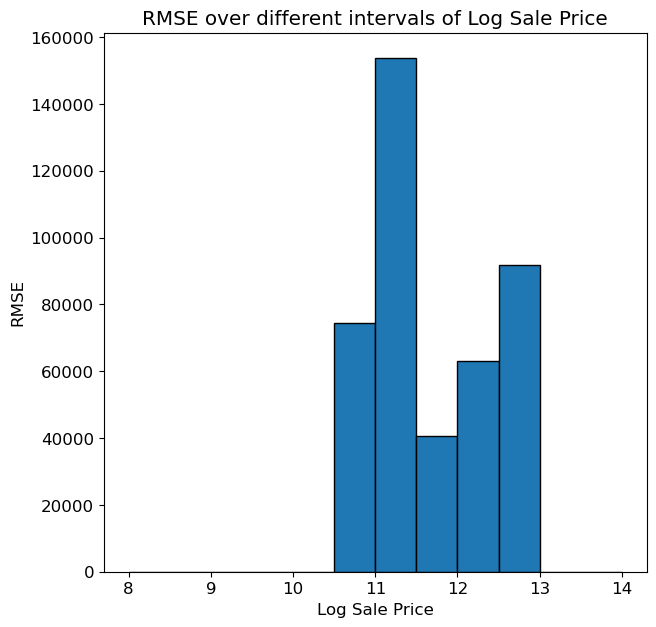

In [54]:
rmses = []
for i in np.arange(8, 14, 0.5):
    rmses.append(rmse_interval(X, Y, i, i + 0.5))
plt.figure(figsize = (7, 7))
plt.bar(x = np.arange(8.25, 14.25, 0.5), height = rmses, edgecolor = 'black', width = 0.5)
plt.title('RMSE over different intervals of Log Sale Price')
plt.xlabel('Log Sale Price')
plt.ylabel('RMSE');

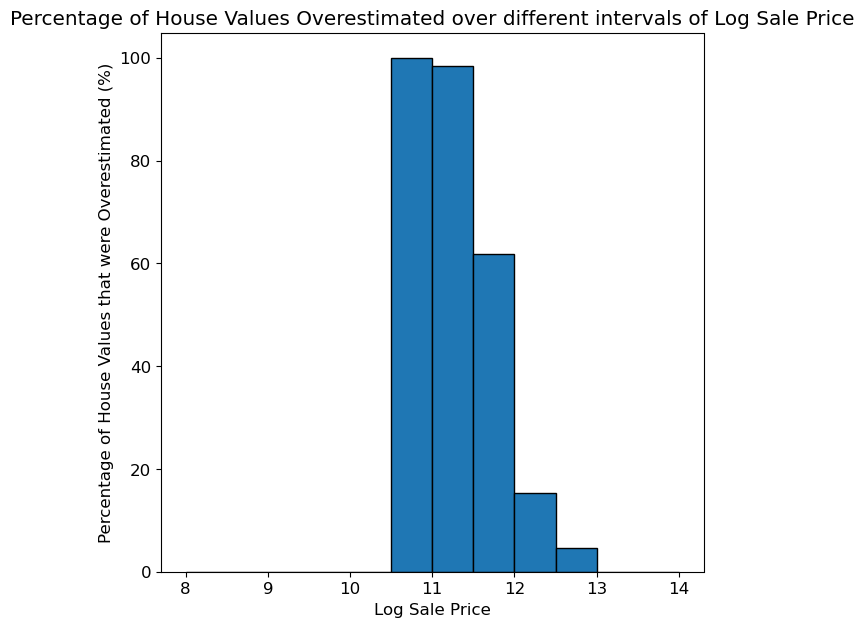

In [55]:
props = []
for i in np.arange(8, 14, 0.5):
    props.append(prop_overest_interval(X, Y, i, i + 0.5) * 100)
plt.figure(figsize = (7, 7))
plt.bar(x = np.arange(8.25, 14.25, 0.5), height = props, edgecolor = 'black', width = 0.5)
plt.title('Percentage of House Values Overestimated over different intervals of Log Sale Price')
plt.xlabel('Log Sale Price')
plt.ylabel('Percentage of House Values that were Overestimated (%)');

Referencing the props plot, it seems that the assessments the model predicts more closely align with an assessment process that systematically overvalues inexpensive properties and undervalues expensive properties. This is because as the Log Sale Price increases (moving from left to right on the x-axis), the percentage of properties that are overestimated decreases. This indicates that the model tends to overvalue inexpensive properties (high percentage of overestimation at lower Log Sale Price) and undervalue expensive properties (low percentage of overestimation at higher Log Sale Price).

Between the two plots provided, the props plot would be more useful in ascertaining whether the assessments resulted in progressive or regressive taxation. This is because this plot directly shows the percentage of properties that were overvalued across different price intervals, allowing us to see any systematic bias in assessments.

#### Evaluating the Model in Context

When determining a house's value, a residual refers to the discrepancy between its predicted and actual sale prices. This is calculated by taking the difference between the logarithms of the two prices. If the residual is positive, it means the predicted value exceeded the actual sale price. Conversely, a negative residual suggests the prediction was below the selling price. The influence of residuals on property taxes often depends on the specific tax structure. However, since property taxes are typically based on the property's assessed value—which often mirrors the sale price—a significant residual can greatly affect the assessed value and consequently the property tax. A higher residual might result in increased property taxes, while a lower one could reduce them.

In the case of the Cook County Assessor’s Office, Chief Data Officer Rob Ross states that fair property tax rates are contingent on whether property values are assessed accurately - that they’re valued at what they’re worth, relative to properties with similar characteristics. This implies that having a more accurate model results in fairer assessments. The goal of the property assessment process for the CCAO, then, is to be as accurate as possible. 

When the use of algorithms and statistical modeling has real-world consequences, we often refer to the idea of fairness as a measurement of how socially responsible our work is. Fairness is incredibly multifaceted: Is a fair model one that minimizes loss - one that generates accurate results? Is it one that utilizes "unbiased" data? Or is fairness a broader goal that takes historical contexts into account?

These approaches to fairness are not mutually exclusive. If we look beyond error functions and technical measures of accuracy, we'd not only consider _individual_ cases of fairness, but also what fairness - and justice - means to marginalized communities on a broader scale. We'd ask: What does it mean when homes in predominantly Black and Hispanic communities in Cook County are consistently overvalued, resulting in proportionally higher property taxes? When the white neighborhoods in Cook County are consistently undervalued, resulting in proportionally lower property taxes? 

Having "accurate" predictions doesn't necessarily address larger historical trends and inequities, and fairness in property assessments in taxes works beyond the CCAO's valuation model. Disassociating accurate predictions from a fair system is vital to approaching justice at multiple levels. Take Evanston, IL - a suburb in Cook County - as an example of housing equity beyond just improving a property valuation model: Their City Council members [recently approved reparations for African American residents](https://www.usnews.com/news/health-news/articles/2021-03-23/chicago-suburb-approves-government-reparations-for-black-residents).

## Conclusion

In this project, I explored and analyzed a comprehensive dataset from Cook County, Illinois, to understand the factors influencing property values and to build a predictive model for property assessments. The project was divided into multiple parts, each addressing a critical aspect of data exploration, feature engineering, model building, and evaluation.

### Exploratory Data Analysis (EDA)

I began by performing basic exploratory data analysis to get a sense of the data structure and the relationships between different variables. This step involved visualizing distributions, identifying outliers, and understanding the spread of `Sale Price` and other key features. Through EDA, I gained valuable insights that informed subsequent steps in the project.

### Feature Engineering

Next, I focused on feature engineering to create new, meaningful features from the raw data. This included:
- Extracting the number of bedrooms from property descriptions.
- Log-transforming the `Sale Price` and `Building Square Feet` to address skewness and make relationships more linear.
- Creating indicator variables for expensive neighborhoods based on median sale prices.
- One-hot encoding categorical variables like `Roof Material` to make them usable in regression models.

### Model Building

With the engineered features, I built multiple linear regression models to predict the `Log Sale Price` of properties. I started with simple models using one or two features and progressively incorporated more features to improve the model's accuracy. The models were evaluated using RMSE, and I examined the residuals to identify patterns and potential biases.

### Fine-Grained Analysis

To better understand model performance across different property price ranges, I performed a fine-grained analysis. I computed RMSE and the proportion of overestimated predictions for various intervals of `Log Sale Price`. This analysis helped identify whether the model systematically overvalued or undervalued properties in specific price ranges.

### Fairness and Real-World Implications

Throughout the project, I considered the real-world implications of the predictive model, particularly in the context of fairness and equity. Accurate property assessments are crucial for fair property tax rates, but historical trends and biases must also be addressed to ensure justice for marginalized communities. The project highlighted the importance of considering both technical accuracy and broader social impacts in data science work.

### Conclusion

The project demonstrated the complexity and challenges of building an accurate and fair property valuation model. By combining thorough EDA, thoughtful feature engineering, rigorous model evaluation, and an awareness of social context, I developed a deeper understanding of both the technical and ethical dimensions of predictive modeling. The insights gained from this project can inform future work in property assessment, ensuring that models are not only accurate but also equitable and socially responsible.

Overall, this project reinforced the importance of integrating data science with a commitment to fairness and justice, particularly in applications with significant real-world consequences like property taxation.